# **Assignment 5: Logistic Regression**


## **In this assignment we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.**

## **This data set contains the following features:**
* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': customer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

# **A. Import a few libraries you think you'll need**

In [1]:
# Import necessary libraries for data analysis and machine learning

# pandas: Library for data manipulation and analysis, providing data structures like DataFrames.
import pandas as pd

# numpy: Library for numerical computing, offering support for arrays and mathematical functions.
import numpy as np

# matplotlib.pyplot: A plotting library for creating static, animated, and interactive visualizations in Python.
import matplotlib.pyplot as plt

# seaborn: A data visualization library based on Matplotlib that provides a high-level interface for drawing attractive statistical graphics.
import seaborn as sns

# train_test_split: Function from scikit-learn to split datasets into training and testing sets for model evaluation.
from sklearn.model_selection import train_test_split

# LogisticRegression: A class from scikit-learn used to implement logistic regression for binary classification tasks.
from sklearn.linear_model import LogisticRegression

# classification_report, confusion_matrix, accuracy_score: Metrics from scikit-learn for evaluating classification models.
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# **B. Read in the advertising.csv file and set it to a data frame called ad_data**

In [5]:
# Load the advertising dataset from a CSV file into a pandas DataFrame
# The pd.read_csv() function reads the specified file and returns a DataFrame, 
# which is a two-dimensional labeled data structure with columns of potentially 
# different types. This DataFrame (ad_data) will contain the advertising data 
# needed for analysis and modeling.
ad_data = pd.read_csv("advertising.csv")

# Display the contents of the ad_data DataFrame
ad_data


Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                       68.95   35     61833.90                256.09   
1                       80.23   31     68441.85                193.77   
2                       69.47   26     59785.94                236.50   
3                       74.15   29     54806.18                245.89   
4                       68.37   35     73889.99                225.58   
..                        ...  ...          ...                   ...   
995                     72.97   30     71384.57                208.58   
996                     51.30   45     67782.17                134.42   
997                     51.63   51     42415.72                120.37   
998                     55.55   19     41920.79                187.95   
999                     45.01   26     29875.80                178.35   

                             Ad Topic Line            City  Male  \
0       Cloned 5thgeneration orchestration     Wrightburgh     0   
1       Monitored national standardization       West Jodi     1   
2         Organic bottom-line service-desk        Davidton     0   
3    Triple-buffered reciprocal time-frame  West Terrifurt     1   
4            Robust logistical utilization    South Manuel     0   
..                                     ...             ...   ...   
995          Fundamental modular algorithm       Duffystad     1   
996        Grass-roots cohesive monitoring     New Darlene     1   
997           Expanded intangible solution   South Jessica     1   
998   Proactive bandwidth-monitored policy     West Steven     0   
999        Virtual 5thgeneration emulation     Ronniemouth     0   

                    Country            Timestamp  Clicked on Ad  
0                   Tunisia  2016-03-27 00:53:11              0  
1                     Nauru  2016-04-04 01:39:02              0  
2                San Marino  2016-03-13 20:35:42              0  
3                     Italy  2016-01-10 02:31:19              0  
4                   Iceland  2016-06-03 03:36:18              0  
..                      ...                  ...            ...  
995                 Lebanon  2016-02-11 21:49:00              1  
996  Bosnia and Herzegovina  2016-04-22 02:07:01              1  
997                Mongolia  2016-02-01 17:24:57              1  
998               Guatemala  2016-03-24 02:35:54              0  
999                  Brazil  2016-06-03 21:43:21              1  

[1000 rows x 10 columns]

# **C. Check the head of ad_data**

In [6]:
# Display the first five rows of the ad_data DataFrame using the head() method
# This allows for a quick preview of the dataset, including the structure, 
# column names, and data types. It helps in understanding the content and 
# shape of the dataset, which is essential for further data exploration and analysis.
ad_data.head()


Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0  
2  2016-03-13 20:35:42              0  
3  2016-01-10 02:31:19              0  
4  2016-06-03 03:36:18              0

# **D. Check whether any missing data are there or not.**

In [7]:
# Check for missing values in the ad_data DataFrame using the isnull() method
# The isnull() function returns a DataFrame of the same shape as ad_data, 
# where each cell contains a boolean indicating whether the corresponding cell 
# in the original DataFrame is null (True) or not (False).
# The sum() method then counts the total number of null values in each column.
# This provides insight into the completeness of the dataset and helps identify 
# any columns that may require data cleaning or imputation.
ad_data.isnull().sum()


Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

# **E. Calculate several statistical measures on numerical attributes.**

In [8]:
# Generate summary statistics for the ad_data DataFrame using the describe() method
# The describe() function computes various descriptive statistics for each numerical column,
# including count, mean, standard deviation (std), minimum (min), maximum (max), 
# and the 25th, 50th (median), and 75th percentiles (25%, 50%, 75%).
# This provides a quick overview of the central tendency, dispersion, and shape 
# of the distribution of the dataset's numerical features, helping to identify 
# potential outliers and understand the overall data characteristics.
ad_data.describe()


Daily Time Spent on Site          Age   Area Income  \
count               1000.000000  1000.000000   1000.000000   
mean                  65.000200    36.009000  55000.000080   
std                   15.853615     8.785562  13414.634022   
min                   32.600000    19.000000  13996.500000   
25%                   51.360000    29.000000  47031.802500   
50%                   68.215000    35.000000  57012.300000   
75%                   78.547500    42.000000  65470.635000   
max                   91.430000    61.000000  79484.800000   

       Daily Internet Usage         Male  Clicked on Ad  
count           1000.000000  1000.000000     1000.00000  
mean             180.000100     0.481000        0.50000  
std               43.902339     0.499889        0.50025  
min              104.780000     0.000000        0.00000  
25%              138.830000     0.000000        0.00000  
50%              183.130000     0.000000        0.50000  
75%              218.792500     1.000000        1.00000  
max              269.960000     1.000000        1.00000

# **F. Create a histogram of the ‘Age’ using seaborn package**

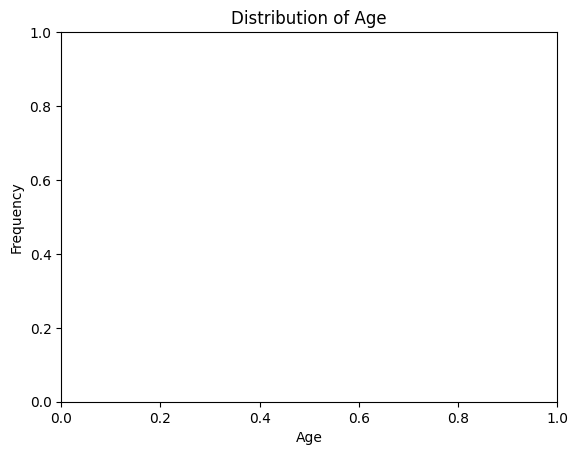

In [9]:
# Create a histogram to visualize the distribution of the 'Age' column in the ad_data DataFrame
# sns.histplot() is used to plot the data, where 'Age' is the variable of interest.
# - bins=30: Specifies the number of bins to divide the range of 'Age', allowing for detailed 
#   insight into the frequency of different age groups.
# The following functions set the title and labels for the axes to enhance the plot's clarity:
plt.title('Distribution of Age')  # Set the title of the histogram
plt.xlabel('Age')                 # Label for the x-axis representing age
plt.ylabel('Frequency')           # Label for the y-axis representing the frequency of occurrences

# Display the histogram
plt.show()


# **G. Create a jointplot showing ‘Area Income’ versus ‘Age’**

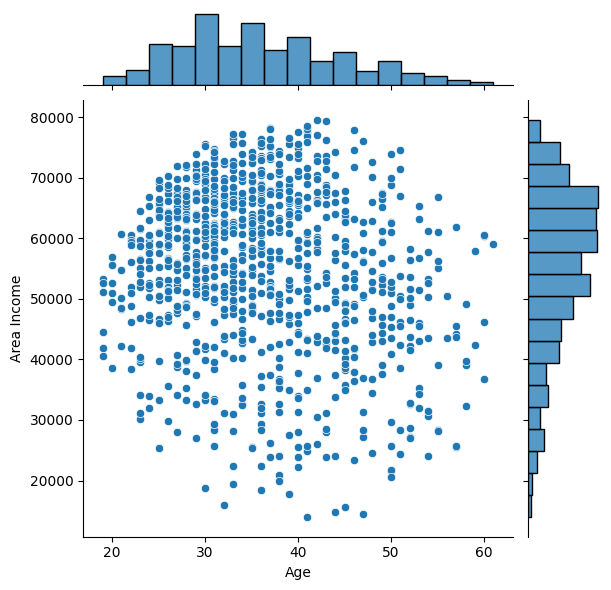

In [10]:
# Create a joint plot to visualize the relationship between 'Age' and 'Area Income'
# using Seaborn's sns.jointplot() function. This plot displays both the scatter plot 
# of the two variables and the distribution of each variable along the axes.
# The joint plot helps to explore the correlation and potential trends between 'Age' 
# and 'Area Income', as well as the distribution of each variable.
sns.jointplot(x='Age', y='Area Income', data=ad_data)

# Display the joint plot
plt.show()


# **H. Create a jointplot showing the kde distributions of ‘Daily Time spent on site’ vs. ‘Age’.**

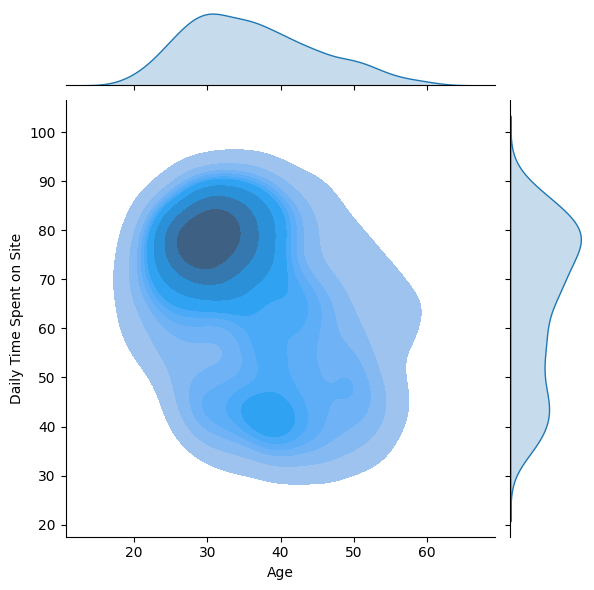

In [11]:
# Create a joint plot to visualize the relationship between 'Age' and 'Daily Time Spent on Site'
# using Seaborn's sns.jointplot() function with the 'kind' parameter set to 'kde'.
# This plot displays a kernel density estimate (KDE) of the two variables, providing a smooth 
# representation of the data distribution. The 'fill=True' parameter fills the contours, 
# enhancing the visual representation of density.
# This helps to explore how age influences daily time spent on the site, 
# revealing potential patterns and trends in the data.
sns.jointplot(x='Age', y='Daily Time Spent on Site', data=ad_data, kind='kde', fill=True)

# Display the joint plot
plt.show()


# **I. Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'.**

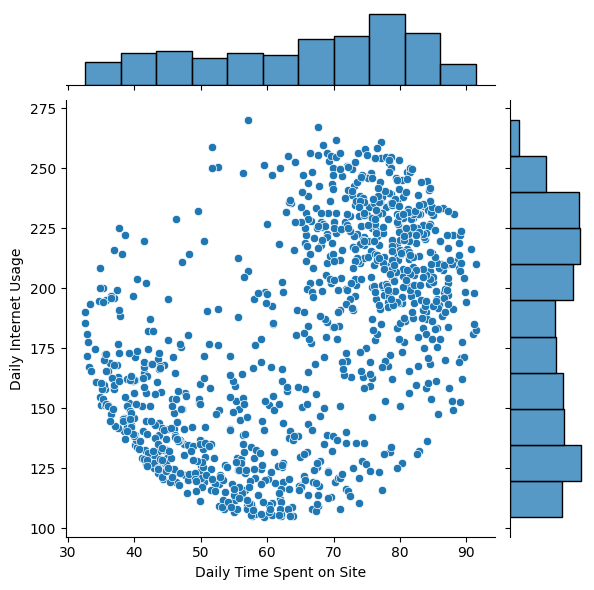

In [12]:
# Create a joint plot to visualize the relationship between 'Daily Time Spent on Site' 
# and 'Daily Internet Usage' using Seaborn's sns.jointplot() function.
# This plot includes a scatter plot of the two variables along with the distribution 
# of each variable along the axes, helping to assess the correlation and potential trends 
# between these two features. Analyzing this relationship can provide insights into how 
# daily time spent on the site relates to overall internet usage.
sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=ad_data)

# Display the joint plot
plt.show()


# **J. Create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

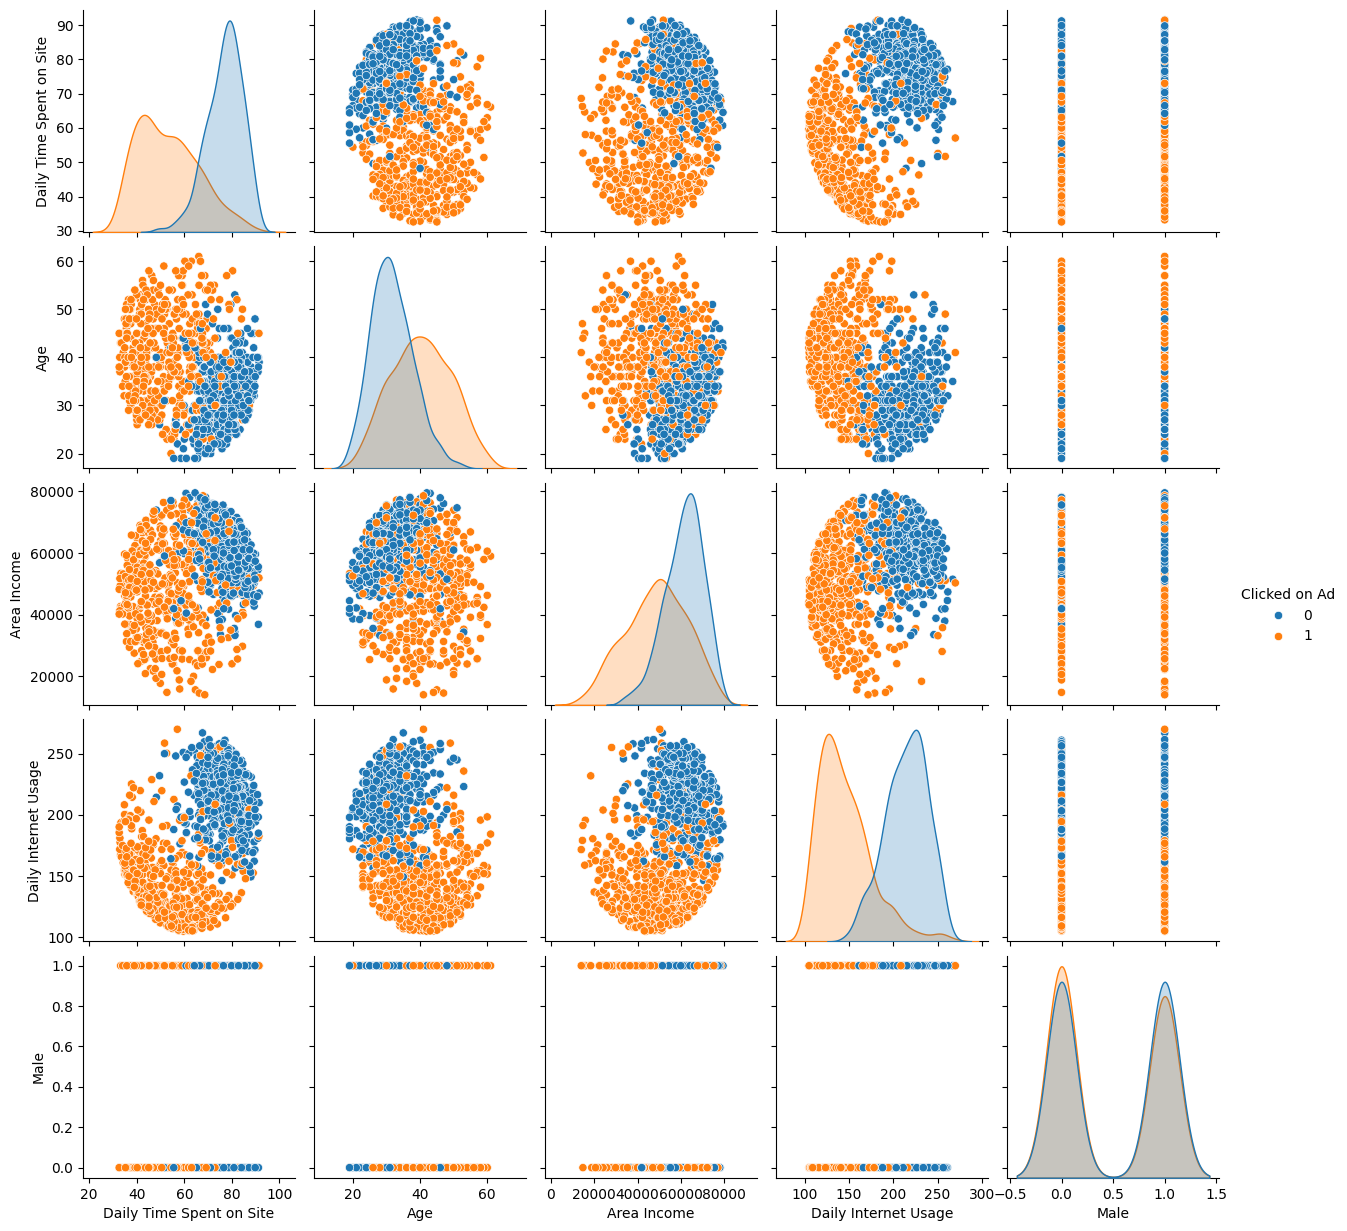

In [13]:
# Create a pair plot to visualize relationships between all numerical features in the ad_data DataFrame
# using Seaborn's sns.pairplot() function. The 'hue' parameter is set to 'Clicked on Ad', which 
# colors the points based on whether the ad was clicked (1) or not (0).
# This allows for a comprehensive view of how different features interact with each other 
# while also revealing patterns or trends related to the ad click-through behavior.
# The pair plot helps in identifying correlations, clusters, and potential separability 
# between the two groups of data (clicked and not clicked).
sns.pairplot(ad_data, hue='Clicked on Ad')

# Display the pair plot
plt.show()


# **K. Choose columns that you want to use for Logistic Regression**

In [14]:
# Define the feature set (X) and target variable (y) for the model

# X: A DataFrame containing the selected features that will be used for prediction.
# It includes:
# - 'Daily Time Spent on Site': The amount of time users spend on the site daily.
# - 'Age': The age of the users.
# - 'Area Income': The average income of the area where users reside.
# - 'Daily Internet Usage': The total time users spend on the internet daily.
# - 'Male': A binary variable indicating gender (1 for male, 0 for female).

X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]

# y: The target variable indicating whether the ad was clicked (1) or not (0).
# This variable will be predicted based on the features in X.
y = ad_data['Clicked on Ad']


# **L. Split the data into training set and testing set so that your testing set consists 25% of total data.**

In [15]:
# Split the dataset into training and testing sets using the train_test_split function
# from scikit-learn. This helps in evaluating the model's performance on unseen data.
# - X: The feature set containing the independent variables.
# - y: The target variable indicating whether the ad was clicked.
# - test_size=0.25: Specifies that 25% of the data will be used for testing, while 75% 
#   will be used for training the model.
# - random_state=42: Ensures reproducibility by setting a seed for the random number generator,
#   allowing for consistent results across multiple runs.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# **M. Train and fit a logistic regression model on the training set.**

In [16]:
# Initialize the logistic regression model using scikit-learn's LogisticRegression class
logmodel = LogisticRegression()

# Fit the logistic regression model to the training data
# - X_train: The feature set used for training the model.
# - y_train: The target variable indicating whether the ad was clicked (1) or not (0).
# The fit() method trains the model by estimating the coefficients that best predict the 
# target variable based on the provided features.
logmodel.fit(X_train, y_train)


LogisticRegression()

# **N. Display all the coefficients values of the fitted Logistic Regression Model.**

In [17]:
# Create a DataFrame to hold the coefficients of the logistic regression model
# - logmodel.coef_: Accesses the coefficients of the fitted model, which indicate the 
#   influence of each feature on the target variable.
# - .T: Transposes the coefficients array to align with the corresponding feature names.
# - X.columns: Provides the names of the features as the index for the DataFrame.
# - columns=['Coefficient']: Sets the column name for the coefficients.
coeff_df = pd.DataFrame(logmodel.coef_.T, X.columns, columns=['Coefficient'])

# Print the coefficients DataFrame to view the influence of each feature on the target variable
print(coeff_df)


                          Coefficient
Daily Time Spent on Site    -0.056962
Age                          0.267076
Area Income                 -0.000015
Daily Internet Usage        -0.027951
Male                         0.001850


# **O. Predict class label for the testing dataset.**

In [18]:
# Use the trained logistic regression model to make predictions on the test set
# - X_test: The feature set that contains the independent variables for which we want to predict 
#   the target variable ('Clicked on Ad').
# The predict() method generates predicted class labels (0 or 1) based on the features in X_test,
# indicating whether the ad is predicted to be clicked (1) or not (0).
predictions = logmodel.predict(X_test)


# **P. Create a classification report for the model.**

In [19]:
# Generate and print a classification report to evaluate the performance of the logistic regression model
# - y_test: The true labels for the test set, representing the actual outcomes of whether the ad was clicked.
# - predictions: The predicted labels generated by the model for the test set.
# The classification report includes key metrics such as precision, recall, F1-score, and support
# for each class (clicked and not clicked). This report provides insights into the model's accuracy 
# and helps assess its effectiveness in distinguishing between the two classes.
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.82      0.97      0.89       120
           1       0.97      0.81      0.88       130

    accuracy                           0.89       250
   macro avg       0.90      0.89      0.89       250
weighted avg       0.90      0.89      0.89       250



# **Q. Create the Confusion matrix for your fitted model and hence calculate the model accuracy.**


In [20]:
# Generate the confusion matrix to evaluate the performance of the logistic regression model
# - y_test: The true labels for the test set.
# - predictions: The predicted labels generated by the model.
# The confusion matrix provides a summary of the model's performance by showing the counts of
# true positive, true negative, false positive, and false negative predictions.
conf_matrix = confusion_matrix(y_test, predictions)
print(f'Confusion Matrix:\n{conf_matrix}')

# Calculate the accuracy of the model
# - accuracy_score: This function computes the ratio of correctly predicted instances to the total instances.
# The accuracy is then multiplied by 100 to express it as a percentage.
accuracy = accuracy_score(y_test, predictions)
print(f'Model Accuracy: {accuracy * 100:.2f}%')


Confusion Matrix:
[[117   3]
 [ 25 105]]
Model Accuracy: 88.80%
